In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import sklearn.model_selection as ms
from scipy.stats import norm
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import (GradientBoostingRegressor , RandomForestRegressor,
                              BaggingRegressor,ExtraTreesRegressor,AdaBoostRegressor)
import xgboost as xgb
from scipy import stats
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

In [99]:
CleanTrain = pd.read_csv('CleanTrain.csv')
CleanTest = pd.read_csv('CleanTest.csv') 

itrain = pd.read_csv('train.csv')
test = pd.read_csv('test.csv') 

In [100]:
itrain.SalePrice = np.log1p(itrain.SalePrice)

iy_train = itrain.SalePrice

itrain.drop("SalePrice", axis=1, inplace=True)



print(iy_train.shape)
iy_train.head()

(1460,)


0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [101]:
CleanTest.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,3.044522,4.394449,9.360741,5,1.945910,7.581720,1961,0.000000,6.150603,4.976734,5.602119,6.783325,6.799056,0.000000,0.0,6.799056,0.0,0.0,1,0.000000,2,0.693147,1.791759,0.000000,1961.0,1.0,730.0,4.948760,0.000000,0.0,0.0,4.795791,0.0,0.000000,6,2010,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1462,3.044522,4.406719,9.565775,6,1.945910,7.580189,1958,4.691348,6.828712,0.000000,6.008813,7.192934,7.192934,0.000000,0.0,7.192934,0.0,0.0,1,0.693147,3,0.693147,1.945910,0.000000,1958.0,1.0,312.0,5.976351,3.610918,0.0,0.0,0.000000,0.0,9.433564,6,2010,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1463,4.110874,4.317488,9.534668,5,1.791759,7.599902,1998,0.000000,6.674561,0.000000,4.927254,6.834109,6.834109,6.553933,0.0,7.396335,0.0,0.0,2,0.693147,3,0.693147,1.945910,0.693147,1997.0,2.0,482.0,5.361292,3.555348,0.0,0.0,0.000000,0.0,0.000000,3,2010,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1464,4.110874,4.369448,9.208238,6,1.945910,7.600402,1998,3.044522,6.401917,0.000000,5.783825,6.831954,6.831954,6.520621,0.0,7.380879,0.0,0.0,2,0.693147,3,0.693147,2.079442,0.693147,1998.0,2.0,470.0,5.888878,3.610918,0.0,0.0,0.000000,0.0,0.000000,6,2010,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1465,4.795791,3.784190,8.518392,8,1.791759,7.597396,1992,0.000000,5.575949,0.000000,6.925595,7.155396,7.155396,0.000000,0.0,7.155396,0.0,0.0,2,0.000000,2,0.693147,1.791759,0.000000,1992.0,2.0,506.0,0.000000,4.418841,0.0,0.0,4.976734,0.0,0.000000,1,2010,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [102]:
# Partition the dataset in train + validation sets

X_train, X_test, y_train, y_test = train_test_split(CleanTrain, iy_train, 
                                                    test_size = 0.3, 
                                                    random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1022, 289)
X_test : (438, 289)
y_train : (1022,)
y_test : (438,)


In [103]:
y_train.head()

64      12.299112
682     12.061053
960     11.665655
1384    11.561725
1100    11.002117
Name: SalePrice, dtype: float64

In [104]:
y_test.head()

529    12.209193
491    11.798112
459    11.608245
279    12.165256
655    11.385103
Name: SalePrice, dtype: float64

In [105]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
64,65,4.110874,4.234107,9.145909,7,1.791759,7.599902,1998,6.352629,6.606650,0.0,5.765191,6.964136,6.964136,6.885510,0.0,7.618251,0.693147,0.0,2,0.693147,3,0.693147,2.197225,0.000000,1998.0,2.0,645.0,6.357842,3.610918,0.0,0.0,0.0,0.0,0.0,2,2009,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
682,683,4.795791,4.234107,7.968320,6,1.791759,7.599401,1997,0.000000,6.911747,0.0,5.666427,7.163947,7.163947,0.000000,0.0,7.163947,0.693147,0.0,1,0.000000,2,0.693147,1.945910,0.693147,1996.0,2.0,431.0,5.730100,0.000000,0.0,0.0,0.0,0.0,0.0,11,2008,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
960,961,3.044522,3.931826,8.882947,5,2.079442,7.580189,2008,0.000000,6.546785,0.0,5.093750,6.755769,6.755769,0.000000,0.0,6.755769,0.693147,0.0,1,0.000000,2,0.693147,1.609438,0.000000,1979.0,0.0,0.0,4.770685,0.000000,0.0,0.0,0.0,0.0,0.0,2,2010,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1384,1385,3.931826,4.110874,9.111735,6,1.791759,7.570443,1950,0.000000,5.323010,0.0,5.877736,6.329721,6.549651,6.329721,0.0,7.138073,0.000000,0.0,1,0.000000,2,0.693147,1.945910,0.000000,1939.0,1.0,280.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,10,2009,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1100,1101,3.433987,4.110874,9.036106,2,1.791759,7.560601,1950,0.000000,5.673323,0.0,0.000000,5.673323,6.084499,0.000000,0.0,6.084499,0.000000,0.0,1,0.000000,1,0.693147,1.386294,0.000000,1930.0,1.0,246.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1,2009,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [106]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
64,65,4.110874,4.234107,9.145909,7,1.791759,7.599902,1998,6.352629,6.606650,0.0,5.765191,6.964136,6.964136,6.885510,0.0,7.618251,0.693147,0.0,2,0.693147,3,0.693147,2.197225,0.000000,1998.0,2.0,645.0,6.357842,3.610918,0.0,0.0,0.0,0.0,0.0,2,2009,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
682,683,4.795791,4.234107,7.968320,6,1.791759,7.599401,1997,0.000000,6.911747,0.0,5.666427,7.163947,7.163947,0.000000,0.0,7.163947,0.693147,0.0,1,0.000000,2,0.693147,1.945910,0.693147,1996.0,2.0,431.0,5.730100,0.000000,0.0,0.0,0.0,0.0,0.0,11,2008,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
960,961,3.044522,3.931826,8.882947,5,2.079442,7.580189,2008,0.000000,6.546785,0.0,5.093750,6.755769,6.755769,0.000000,0.0,6.755769,0.693147,0.0,1,0.000000,2,0.693147,1.609438,0.000000,1979.0,0.0,0.0,4.770685,0.000000,0.0,0.0,0.0,0.0,0.0,2,2010,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1384,1385,3.931826,4.110874,9.111735,6,1.791759,7.570443,1950,0.000000,5.323010,0.0,5.877736,6.329721,6.549651,6.329721,0.0,7.138073,0.000000,0.0,1,0.000000,2,0.693147,1.945910,0.000000,1939.0,1.0,280.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,10,2009,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1100,1101,3.433987,4.110874,9.036106,2,1.791759,7.560601,1950,0.000000,5.673323,0.0,0.000000,5.673323,6.084499,0.000000,0.0,6.084499,0.000000,0.0,1,0.000000,1,0.693147,1.386294,0.000000,1930.0,1.0,246.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1,2009,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [107]:
# from directions example: reg model

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, 
                                   scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [108]:
# from directions example 2 : 

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train,y_train, 
                                   scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, 
                                   scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

# Linear Regression: 

In [109]:
print(CleanTrain.shape)
print(CleanTest.shape)
print(iy_train.shape)

(1460, 289)
(1459, 289)
(1460,)


In [110]:
# Linear Regression

lr = LinearRegression()
lr.fit(CleanTrain, iy_train)   # totally correct

y_train_predict = lr.predict(CleanTrain)
Y_test_predict = lr.predict(CleanTest)

est_train = np.sqrt(mean_squared_error(y_train_predict, iy_train))
print('Linear Regression RMSE on Train set: {}'.format(est_train))

# save predictions to DF
results = pd.Series(Y_test_predict)
id_price = list(zip(range(1461, 2920), np.exp(Y_test_predict)))
predictions = pd.DataFrame(id_price, columns=['Id', 'SalePrice'])
predictions.to_csv('submit.csv', index=False)

print(predictions.shape)

Linear Regression RMSE on Train set: 0.0917262804255988
(1459, 2)


In [111]:
predictions.head()

,Id,SalePrice
0,1461,121529.547983
1,1462,166578.556457
2,1463,188651.913882
3,1464,201569.103973
4,1465,198751.359958


# Ridge: 

Best alpha : 10.0
Ridge RMSE on Train set: 0.10632631998632296
Ridge picked 289 features and eliminated the other 0 features


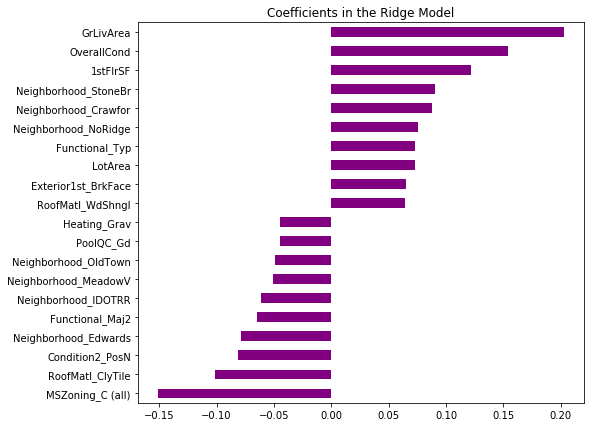

(1459, 2)
     Id      SalePrice
0  1461  117782.713464
1  1462  155071.340245
2  1463  179920.598076
3  1464  193329.891639
4  1465  201212.272045


In [122]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 
                          0.6, 1, 3, 6, 10, 30, 60], cv =10)

ridge.fit(CleanTrain, iy_train) 

alpha = ridge.alpha_

print("Best alpha :", alpha)

y_train_rdg = ridge.predict(CleanTrain)
y_test_rdg = ridge.predict(CleanTest)

rdg_train = np.sqrt(mean_squared_error(y_train_rdg, iy_train))
print('Ridge RMSE on Train set: {}'.format(rdg_train))

# save predictions to DF
results = pd.Series(y_test_rdg)
id_price = list(zip(range(1461, 2920), np.exp(y_test_rdg)))
predictions = pd.DataFrame(id_price, columns=['Id', 'SalePrice'])
predictions.to_csv('submit.csv', index=False)

# Plot important coefficients
plt.figure(figsize=(8,7))
coefs = pd.Series(ridge.coef_, index = CleanTrain.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color="purple")
plt.title("Coefficients in the Ridge Model")
plt.show()

# Ridge RMSE on Training set : 0.12072907256951386
# Ridge RMSE on Test set : 0.14932099100087864
print(predictions.shape)
print(predictions.head())

# Lasso

Best alpha : 0.0005
Lasso RMSE on Train set: 0.10594307429026306
Lasso picked 115 features and eliminated the other 174 features


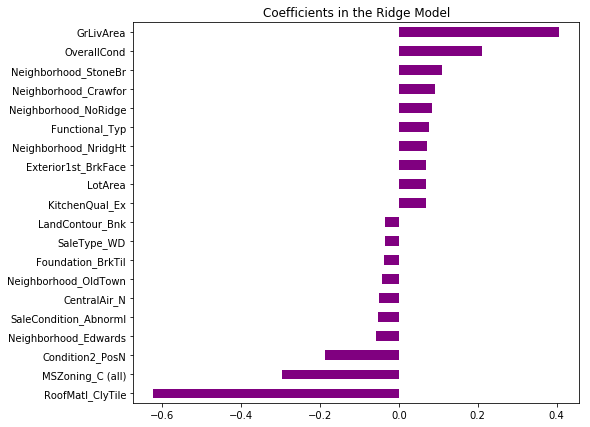

(1459, 2)
     Id      SalePrice
0  1461  118025.676682
1  1462  151922.192228
2  1463  178656.658676
3  1464  192448.233743
4  1465  202985.061477


In [123]:
lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005], cv = 10).fit(CleanTrain, iy_train) 


y_train_predict = lasso.predict(CleanTrain)
y_test_predict = lasso.predict(CleanTest)

alpha = lasso.alpha_
print("Best alpha :", alpha)

lasso_train = np.sqrt(mean_squared_error(y_train_predict, iy_train))
print('Lasso RMSE on Train set: {}'.format(lasso_train))

# save predictions to DF
results = pd.Series(y_test_predict)
id_price = list(zip(range(1461, 2920), np.exp(y_test_predict)))
predictions = pd.DataFrame(id_price, columns=['Id', 'SalePrice'])
predictions.to_csv('submit.csv', index=False)

# Plot important coefficients
plt.figure(figsize=(8,7))
coefs = pd.Series(lasso.coef_, index = CleanTrain.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color="purple")
plt.title("Coefficients in the Ridge Model")
plt.show()

print(predictions.shape)
print(predictions.head())

# ElasticNet

Best alpha : 0.0006
ElasticNet RMSE on Train set: 0.10380331257659145
ElasticNet picked 127 features and eliminated the other 162 features


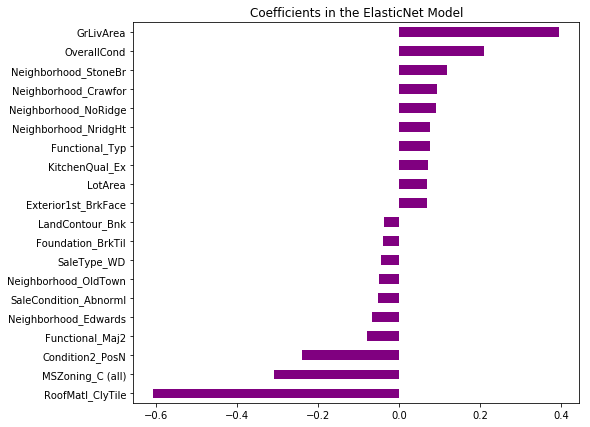

(1459, 2)
     Id      SalePrice
0  1461  117966.183027
1  1462  152558.853375
2  1463  179570.372707
3  1464  192542.184672
4  1465  203162.766737


In [125]:
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 
                                      0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 
                                    0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1,
                                    0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)

elasticNet.fit(CleanTrain, iy_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_

print("Best alpha :", alpha)

y_train_ela = elasticNet.predict(CleanTrain)
y_test_ela = elasticNet.predict(CleanTest)

elasticNet_train = np.sqrt(mean_squared_error(y_train_ela, iy_train))
print('ElasticNet RMSE on Train set: {}'.format(elasticNet_train))

results = pd.Series(y_test_ela)
id_price = list(zip(range(1461, 2920), np.exp(y_test_ela)))
predictions = pd.DataFrame(id_price, columns=['Id', 'SalePrice'])
predictions.to_csv('submit.csv', index=False)


# Plot important coefficients
plt.figure(figsize=(8,7))
coefs = pd.Series(elasticNet.coef_, index = CleanTrain.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) 
      + " features and eliminated the other " 
      +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color = "purple")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

# ElasticNet RMSE on Training set : 0.11678387169777557
# ElasticNet RMSE on Test set : 0.1381650415290418
# ElasticNet RMSE on Test set: 0.1382999305592934  (OTHER MODEL) worse? 

print(predictions.shape)
print(predictions.head())

# Random Forest



Random Forest RMSE on Train set: 0.05254012299495452


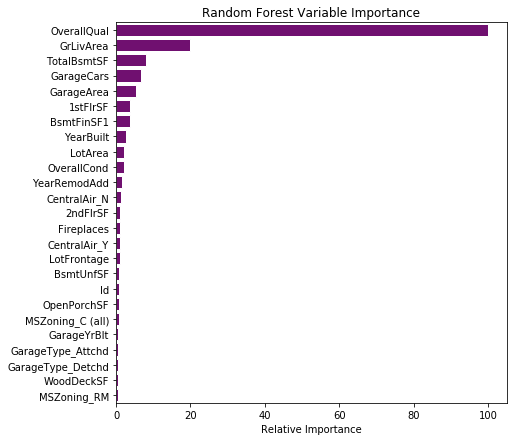

(1459, 2)
     Id      SalePrice
0  1461  125971.450878
1  1462  150781.735678
2  1463  177006.135698
3  1464  182436.475014
4  1465  195519.607316


In [128]:
ModelRF = RandomForestRegressor(n_estimators=100)

ModelRF.fit(CleanTrain, iy_train)

kf = ms.KFold(n_splits=5, shuffle=True)

#scores = ms.cross_val_score(ModelRF, X_train, y_train, cv=10)

#print(scores.mean())
print('')
print('')

y_train_predict = ModelRF.predict(CleanTrain)
y_test_predict = ModelRF.predict(CleanTest)

RF_train = np.sqrt(mean_squared_error(y_train_predict, iy_train))
print('Random Forest RMSE on Train set: {}'.format(RF_train))

results = pd.Series(y_test_predict)
id_price = list(zip(range(1461, 2920), np.exp(y_test_predict)))
predictions = pd.DataFrame(id_price, columns=['Id', 'SalePrice'])
predictions.to_csv('submit.csv', index=False)

# plot important coeff
feature_importance = ModelRF.feature_importances_
feature_importance = 100 * (feature_importance / feature_importance.max())

sorted_index = np.argsort(feature_importance)
featimp = feature_importance[sorted_index]
feat = CleanTrain.columns[sorted_index]
pos = np.arange(sorted_index.shape[0]) + .5

a = 0 
b = 25 # max features
c = b - a

featimp= featimp[::-1][a:b]
feat = feat[::-1][a:b]
pos = pos[::-1][a:b]

fig = plt.figure(figsize=(7,7))
plt.subplot2grid((1,1), (0,0))
with sns.axes_style("white"):
    ax = sns.barplot(y=feat, x=featimp, color = "purple")
plt.xlabel('Relative Importance')
plt.title('Random Forest Variable Importance'.format(c))
plt.show()

# RF RMSE on Training set : 0.14614940952261377
# RF RMSE on Test set : 0.15700335115676084
# RMSE on the Test set is: 0.1337874100860515   (OTHER MODEL) way better

print(predictions.shape)
print(predictions.head())

# Gradient Boosting

Gradient Boosting RMSE on Train set: 0.06813281203073027


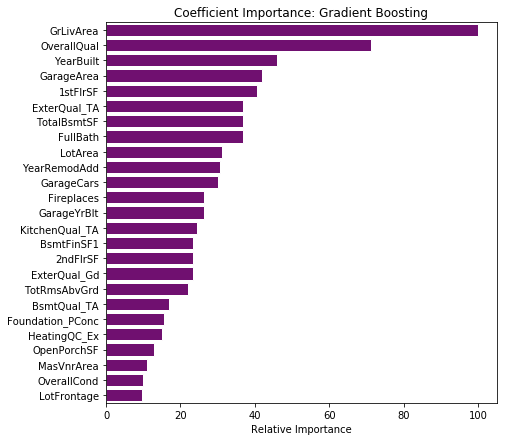

(1459, 2)
     Id      SalePrice
0  1461  124180.242940
1  1462  157639.707444
2  1463  185654.504390
3  1464  196274.102225
4  1465  183353.711582


In [129]:
GBoost = GradientBoostingRegressor(n_estimators=1000, 
                                   learning_rate=0.01,
                                   max_depth=9, 
                                   max_features='sqrt',
                                   min_samples_leaf=10, 
                                   min_samples_split=5, 
                                   loss='huber', 
                                   random_state =5)
GBoost.fit(CleanTrain, iy_train)

y_train_predict = GBoost.predict(CleanTrain)
y_test_predict = GBoost.predict(CleanTest)

GB_train = np.sqrt(mean_squared_error(y_train_predict, iy_train))
print('Gradient Boosting RMSE on Train set: {}'.format(GB_train))

# save results to DF
results = pd.Series(y_test_predict)
id_price = list(zip(range(1461, 2920), np.exp(y_test_predict)))
predictions = pd.DataFrame(id_price, columns=['Id', 'SalePrice'])
predictions.to_csv('submit.csv', index=False)

# plot important coeff
feature_importance = GBoost.feature_importances_
feature_importance = 100 * (feature_importance / feature_importance.max())

sorted_index = np.argsort(feature_importance)
featimp = feature_importance[sorted_index]
feat = CleanTrain.columns[sorted_index]
pos = np.arange(sorted_index.shape[0]) + .5

a = 0 
b = 25 # max features
c = b - a

featimp= featimp[::-1][a:b]
feat = feat[::-1][a:b]
pos = pos[::-1][a:b]

fig = plt.figure(figsize=(7,7))
plt.subplot2grid((1,1), (0,0))
with sns.axes_style("white"):
    ax = sns.barplot(y=feat, x=featimp, color = "purple")
plt.xlabel('Relative Importance')
plt.title('Coefficient Importance: Gradient Boosting'.format(c))
plt.show()

# RF RMSE on Training set : 0.12637208439785869
# RF RMSE on Test set : 0.13375744892306773
# RMSE on Test set is: 0.1222217172564762  (OTHER MODEL)    way better

print(predictions.shape)
print(predictions.head())

# Random Forest: train_test_split

In [134]:
ModelRF = RandomForestRegressor(n_estimators=100)

ModelRF.fit(X_train, y_train)

y_train_predict = ModelRF.predict(X_train)
y_test_predict = ModelRF.predict(X_test)

est_train = np.sqrt(mean_squared_error(y_train, y_train_predict))
print('RMSE on the Train set is: {}'.format(est_train))

est_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
print('RMSE on the Test set is: {}'.format(est_test))


# save results to DF
results = pd.Series(y_test_predict)
id_price = list(zip(range(1461, 2920), np.exp(y_test_predict)))
predictions = pd.DataFrame(id_price, columns=['Id', 'SalePrice'])
predictions.to_csv('submit.csv', index=False)

print(predictions.head())

RMSE on the Train set is: 0.05667215008743962
RMSE on the Test set is: 0.13303654982777255
     Id      SalePrice
0  1461  196909.585887
1  1462  143208.778787
2  1463  113197.831573
3  1464  227456.475142
4  1465   88622.425871


# ElasticNet: train_test_split

Best l1_ratio : 0.85
Best alpha : 0.0006
ElasticNet RMSE on Train set: 0.10028017503402072
ElasticNet RMSE on Test set: 0.13749878082425568
ElasticNet picked 110 features and eliminated the other 179 features


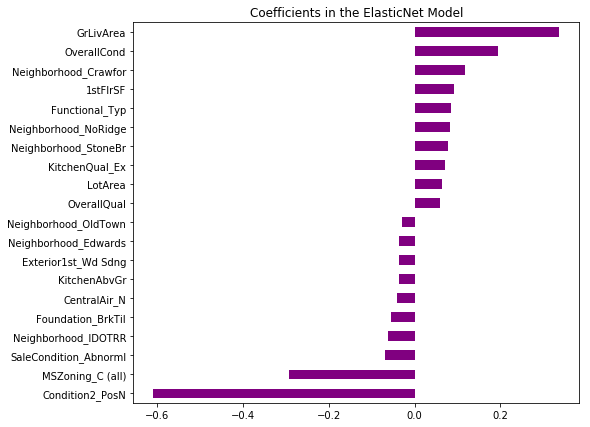

In [131]:
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 
                                      0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 
                                    0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1,
                                    0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)

elasticNet.fit(X_train, y_train)

alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_

print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

y_train_predict = elasticNet.predict(X_train)
y_test_predict = elasticNet.predict(X_test)

est_train = np.sqrt(mean_squared_error(y_train, y_train_predict))
print('ElasticNet RMSE on Train set: {}'.format(est_train))

est_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
print('ElasticNet RMSE on Test set: {}'.format(est_test))


# Plot important coefficients
plt.figure(figsize=(8,7))
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) 
      + " features and eliminated the other " 
      +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color = "purple")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

# ElasticNet RMSE on Training set : 0.11678387169777557
# ElasticNet RMSE on Test set : 0.1381650415290418

# Lasso: train_test_split

Best alpha : 0.0006
Lasso RMSE on Train set: 0.10176055175458085
Lasso RMSE on Test set: 0.13715417702123348
Lasso picked 107 features and eliminated the other 182 features


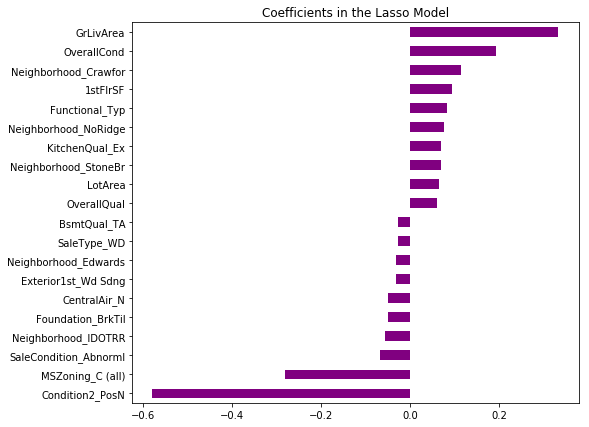

In [133]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 
                          0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)

lasso.fit(X_train, y_train)

alpha = lasso.alpha_

print("Best alpha :", alpha)

y_train_predict = lasso.predict(X_train)
y_test_predict = lasso.predict(X_test)

est_train = np.sqrt(mean_squared_error(y_train, y_train_predict))
print('Lasso RMSE on Train set: {}'.format(est_train))

est_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
print('Lasso RMSE on Test set: {}'.format(est_test))


# Plot important coefficients
plt.figure(figsize=(8,7))
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) 
      + " features and eliminated the other " 
      +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color = "purple")
plt.title("Coefficients in the Lasso Model")
plt.show()

# Ridge: train_test_split

Best alpha : 3.0
Ridge RMSE on Train set: 0.09412514718396259
Ridge RMSE on Test set: 0.14286196943664328
Ridge picked 281 features and eliminated the other 8 features


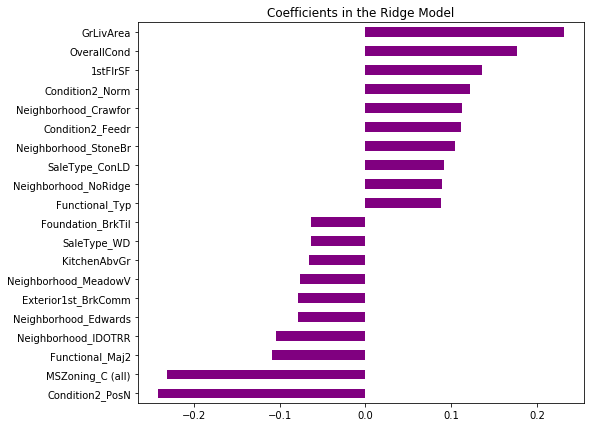

In [135]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 
                          0.6, 1, 3, 6, 10, 30, 60], cv=10)

ridge.fit(X_train, y_train)

alpha = ridge.alpha_

print("Best alpha :", alpha)

y_train_predict = ridge.predict(X_train)
y_test_predict = ridge.predict(X_test)

ridge_train = np.sqrt(mean_squared_error(y_train, y_train_predict))
print('Ridge RMSE on Train set: {}'.format(ridge_train))

ridge_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
print('Ridge RMSE on Test set: {}'.format(ridge_test))


# Plot important coefficients
plt.figure(figsize=(8,7))
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) 
      + " features and eliminated the other " 
      +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color = "purple")
plt.title("Coefficients in the Ridge Model")
plt.show()

# Ridge RMSE on Train set: 0.09689088634380061
# Ridge RMSE on Test set: 0.1393662927610361

In [138]:
#LASSO MODEL
clf1 = LassoCV(alphas = [1, 0.1, 0.001, 0.0005, 5e-4])
clf1.fit(X_train, y_train)
lasso_preds = np.expm1(clf1.predict(X_train))

#ELASTIC NET
clf2 = ElasticNet(alpha=0.0005, l1_ratio=0.9)
clf2.fit(X_train, y_train)
elas_preds = np.expm1(clf2.predict(X_train))

#XGBOOST
clf3=xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0.045,                 
                 learning_rate=0.07,
                 max_depth=20,
                 min_child_weight=1.5,
                 n_estimators=300,                                                                    
                 reg_alpha=0.65,
                 reg_lambda=0.45,
                 subsample=0.95)

clf3.fit(CleanTrain, iy_train)

xgb_preds = np.expm1(clf3.predict(CleanTrain))

final_result = 0.50*lasso_preds + 0.24*xgb_preds+0.26*elas_preds

solution = pd.DataFrame({"id":iy_train.Id, "SalePrice":final_result},
                        columns=['id', 'SalePrice'])

ValueError: operands could not be broadcast together with shapes (1022,) (1460,) 